In [132]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as plt

#estimates for vehicle kilometres travelled. VKT_per_hh is a daily average
input_vkt = pd.read_csv("./input-vkt-by-da-estimate.csv")

#Census Data 
#census_2006 = pd.read_csv("../census-file-handling/Data/Census Data/Census2006.csv")
#census_2021 = pd.read_csv("../census-file-handling/Data/Census Data/Census2021.csv")
census_2021 = pd.read_csv("C:/Users/mliu/One Drive/OneDrive - Amdev Property/3 School of Cities/census-file-handling/Data/Census Data/Census2021.csv")
energy = pd.read_csv("./input-ghg-ontario.csv")
#GGH_DA_with_CSDUID_21 = pd.read_csv("../census-file-handling/Data/GGH_DA_with_CSDUID_21.csv")
GGH_DA_with_CSDUID_21 = pd.read_csv("../census-summary-data-2006-2021/part-a-results/GGH-census-da-21.csv")
GGH_DA_with_CSDUID_21 = GGH_DA_with_CSDUID_21[['DAUID', 'Macro','Municipality']].copy()
region_summary = pd.read_csv("../regions-summary.csv")


In [133]:
census_2021

,GEO UID,Population,Land area in square kilometres,Total dwellings,Total dwelling type,Single-detached house,Semi-detached house,Row house,Apartment or flat in a duplex,Apartment in a building that has five or more storeys,Apartment in a building that has fewer than five storeys,Other single-attached house,Movable dwelling,Total households
0,3501,114637.0,3308.85,50802.0,48695.0,34030.0,3045.0,1665.0,2155.0,1190.0,6035.0,185.0,385.0,48690.0
1,35010155,457.0,65.49,213.0,190.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,190.0
2,35010156,449.0,53.66,217.0,195.0,190.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,195.0
3,35010157,472.0,66.49,215.0,205.0,195.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,200.0
4,35010158,495.0,39.00,226.0,205.0,205.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20512,35600408,727.0,1215.80,1061.0,330.0,320.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,330.0
20513,35600409,547.0,350517.68,611.0,235.0,225.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,230.0
20514,35600410,38.0,2.92,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20515,35600411,10.0,0.10,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Part A  - Estimating Household Transport Emissions

In [134]:

#household_2006 = census_2006[['Dauid', 'Total households']].copy()
household_2021 = census_2021[['GEO UID', 'Total households']].copy()

#household_2006 = pd.merge(household_2006, )



#totalVKT = travel['Total_VKT'].sum()
#travel['Weight'] = travel['Total_VKT']/totalVKT

ontarioHouseholds = 5491205

#household emission in Ontario by year unit: kilotonne, converted to ton
ontarioHHEmi2016 = 49411*1000	
ontarioHHEmi2017 = 50919*1000	
ontarioHHEmi2018 = 54841*1000
ontarioHHEmi2019 = 52173*1000
ontarioHHEmi2020 = 44486*1000

#average ontario household travel emission
ontarioHH_T_Emi2016 = 28752*1000	
ontarioHH_T_Emi2017 = 29527*1000	
ontarioHH_T_Emi2018 = 30473*1000
ontarioHH_T_Emi2019 = 31673*1000
ontarioHH_T_Emi2020 = 25588*1000

#average ontario household electricity and other fuels emission
ontarioHH_EF_Emi2016 = 20659*1000	
ontarioHH_EF_Emi2017 = 21392*1000	
ontarioHH_EF_Emi2018 = 24369*1000
ontarioHH_EF_Emi2019 = 20500*1000
ontarioHH_EF_Emi2020 = 18898*1000



#travel['Weighted Travel Emission (Ton)'] = travel['Weight']*ontarioHH_T_Emi2016

### A1

$$ \bar{g_o} = \frac{e_o*1000}{h_o} $$

where: </br>
-  $\bar{g_o}$ is the average household travel ghg emission in Ontario (tons / household)
- $e_o$ is the total household travel ghg emissions in Ontario in 2020, obtained from [Stats Canada](https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=3810009701)
(kilo-tons)
- $h_o$ is the Total Household Count of Ontario (households)
- By averaging ghg emissions for 2019 and 2020, we get $\bar{g_o} = 0.0052$

$e_o$ is ontarioHH_T_Emi2020 = 25588 <br>
$h_o$ is ontarioHouseholds = 5491205 <br>
$\bar{g_o}$ is calculated below as avgHHEmission

In [135]:
avgHHEmission = ontarioHH_T_Emi2020/ontarioHouseholds
avgHHEmission

4.659815104335023

### A2
Calulating the weights to weight average ontario household travel ghg emission

$$ \bar{v_i} = \frac{\sum_i v_i h_i}{\sum_i hr_i} $$

where:
- $\bar{v_i}$ is the average daily household VKT in a region (km/household)
- $v_i$ is the average daily VKT per household in DA $i$ (km/household)
- $h_i$ is the number of households in Da $i$ (household)





In [136]:
travel = pd.merge(household_2021, input_vkt, left_on = "GEO UID", right_on = "dauid").drop("GEO UID", axis = 1)


${\sum_i v_i h_i}$ <br>

$v_i$ is a field named : 'VKT_per_hh' <br>
$h_i$ is a field named : 'Total Households' (household count per DA) <br>

The result is a variable call total_ggh_vkt

In [137]:
travel['Total_VKT'] = travel['Total households']*travel['VKT_per_hh']
total_ggh_vkt = travel['Total_VKT'].sum()
#join with GGH_DA_with_CSDUID_21 to include municipality and macro information
#travel = pd.merge(GGH_DA_with_CSDUID_21, travel, right_on = "dauid", left_on = "DAUID").drop('dauid', axis =1)
travel

,Total households,dauid,VKT_per_hh,Total_VKT
0,265.0,35140110,85.594658,22682.584246
1,295.0,35140111,84.020058,24785.917256
2,220.0,35140112,85.732578,18861.167229
3,185.0,35140113,81.712215,15116.759805
4,235.0,35140114,84.128746,19770.255323
...,...,...,...,...
12994,210.0,35431433,85.180391,17887.882124
12995,245.0,35431434,105.432945,25831.071534
12996,NaN,35431435,86.323915,NaN
12997,415.0,35431436,88.008418,36523.493558


In [138]:
"""#Summing the total household and VKT by region
ggh_travel_emission = pd.pivot_table(travel, values = ['Total households', 'Total_VKT'], index = 'Municipality', aggfunc = np.sum).reset_index()
#joining the pivot table with the travel table
ggh_travel_emission = pd.merge(travel, ggh_travel_emission, on = 'Municipality')
ggh_travel_emission = ggh_travel_emission.rename(columns={f"Total_VKT_y": f"Regional Total VKT"})"""

'#Summing the total household and VKT by region\nggh_travel_emission = pd.pivot_table(travel, values = [\'Total households\', \'Total_VKT\'], index = \'Municipality\', aggfunc = np.sum).reset_index()\n#joining the pivot table with the travel table\nggh_travel_emission = pd.merge(travel, ggh_travel_emission, on = \'Municipality\')\nggh_travel_emission = ggh_travel_emission.rename(columns={f"Total_VKT_y": f"Regional Total VKT"})'

$\sum_i hr_i$ <br>
is summing the results by the whole region, region refers to the entire GGH <br>
it is a variable called total_ggh_hh



In [139]:
#ggh_travel_emission = ggh_travel_emission.rename(columns={f"Total households_y": f"Regional Total Households"})
total_ggh_hh = travel['Total households'].sum()
total_ggh_hh

3619765.0

$$ \bar{v_i} = \frac{\sum_i v_i h_i}{\sum_i hr_i} $$

$ \bar{v_i}$ <br>
It is a variable named: 'avg_ggh_vkt'

In [140]:
"""ggh_travel_emission['Avg Regional Household VKT'] = ggh_travel_emission["Regional Total VKT"] / ggh_travel_emission["Regional Total Households"]
ggh_travel_emission.to_csv("../ghg-analysis/ghgVKT.csv")"""
avg_ggh_vkt = total_ggh_vkt / total_ggh_hh
avg_ggh_vkt

54.770259701639915

### A3

To calulate household travel ghg emission in the Greater Golden Horseshoe (GGH), $\bar{g_o}$ is then up-or-down-weighted by the average daily VKT per household at the DA level.

$$ g_i = \bar{g_o} \frac{v_i}{\bar{v_i}} $$

where:
- $g_i$ is the transportation fuel emissions per household for each DA (ton / household)
-  $\bar{g_o}$ is the average household travel ghg emission in Ontario (tons / household)
- $v_i$ is the average daily VKT per household in DA $i$ (km / household)
- $\bar{v_i}$ is the average daily household VKT in a region (km/household)


$  \frac{v_i}{\bar{v_i}} $ <br>
It is a field called 'VKT Ratio'

$ g_i = \bar{g_o} \frac{v_i}{\bar{v_i}} $ <br>
$ g_i $ is a field called 'Travel Emission (Tons Per Household)'

In [141]:

travel['Travel Emission (Tons Per Household)'] = avgHHEmission * travel['VKT_per_hh'] / avg_ggh_vkt
travel

,Total households,dauid,VKT_per_hh,Total_VKT,Travel Emission (Tons Per Household)
0,265.0,35140110,85.594658,22682.584246,7.282333
1,295.0,35140111,84.020058,24785.917256,7.148367
2,220.0,35140112,85.732578,18861.167229,7.294067
3,185.0,35140113,81.712215,15116.759805,6.952018
4,235.0,35140114,84.128746,19770.255323,7.157614
...,...,...,...,...,...
12994,210.0,35431433,85.180391,17887.882124,7.247088
12995,245.0,35431434,105.432945,25831.071534,8.970161
12996,NaN,35431435,86.323915,NaN,7.344378
12997,415.0,35431436,88.008418,36523.493558,7.487694


In [142]:
travel['Total Travel Emission (Tons)'] = travel['Travel Emission (Tons Per Household)']*travel['Total households']
travel

,Total households,dauid,VKT_per_hh,Total_VKT,Travel Emission (Tons Per Household),Total Travel Emission (Tons)
0,265.0,35140110,85.594658,22682.584246,7.282333,1929.818285
1,295.0,35140111,84.020058,24785.917256,7.148367,2108.768376
2,220.0,35140112,85.732578,18861.167229,7.294067,1604.694818
3,185.0,35140113,81.712215,15116.759805,6.952018,1286.123273
4,235.0,35140114,84.128746,19770.255323,7.157614,1682.039393
...,...,...,...,...,...,...
12994,210.0,35431433,85.180391,17887.882124,7.247088,1521.888407
12995,245.0,35431434,105.432945,25831.071534,8.970161,2197.689366
12996,NaN,35431435,86.323915,NaN,7.344378,NaN
12997,415.0,35431436,88.008418,36523.493558,7.487694,3107.393097


In [143]:
ggh_da = gpd.read_file("C:/Users/mliu/One Drive/OneDrive - Amdev Property/3 School of Cities/census-file-handling/Data/lda_000b21a_e/lda_000b21a_e.shp")

<Axes: >

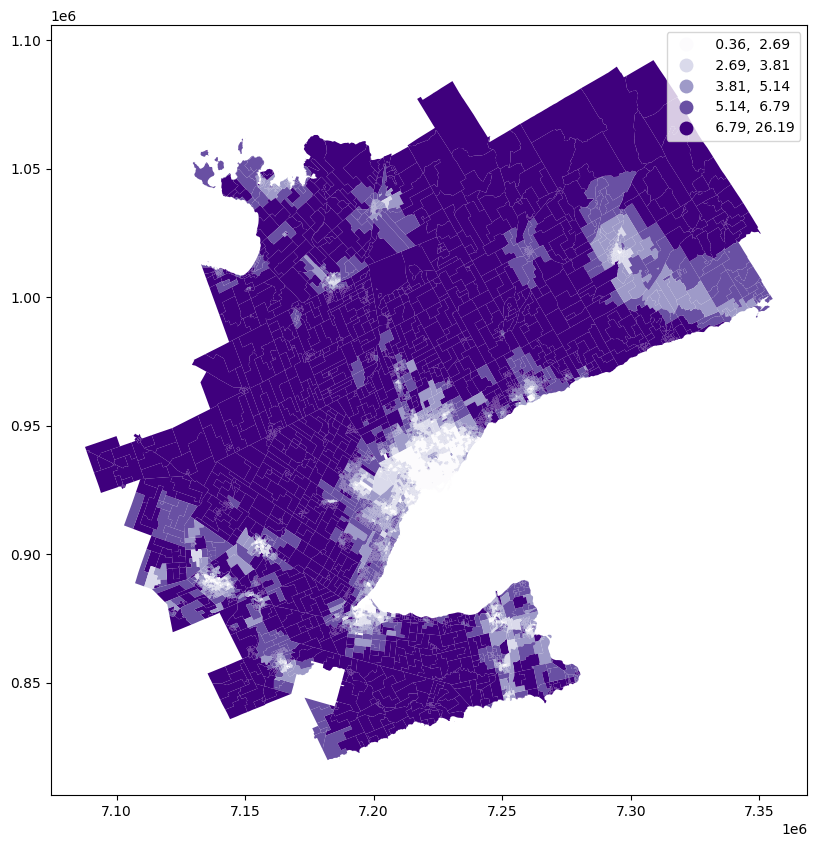

In [144]:

ggh_da["DAUID"] = ggh_da["DAUID"].astype('str')
travel['dauid'] = travel['dauid'].astype('str')

ggh1 = pd.merge(ggh_da, travel, right_on = "dauid", left_on = "DAUID", sort=False).drop(['dauid'], axis = 1)
ggh1.plot(column = 'Travel Emission (Tons Per Household)', legend = True, cmap = "Purples", scheme="quantiles", figsize=(10, 10))


# Part B  - Summarizing Emissions by Reigion

In [145]:
energy['Total Energy Emission (Tons per HH)'] = energy['G_HH_Energy_GHG']*1000 #convert kiloton to ton
energy['dauid']=energy['dauid'].astype('str')
ggh_emission = pd.merge(travel, energy, on = "dauid")
ggh_emission.to_csv("../ghg-analysis/ghg_emission_by_DA.csv")

In [146]:
#calculating energy emission per household
ggh_emission['Total Energy Emission (Tons)'] = ggh_emission['Total Energy Emission (Tons per HH)'] * ggh_emission['Total households']
#summing travel and energy emissions
ggh_emission['Total Emission (Tons)'] = ggh_emission['Total Travel Emission (Tons)'] + ggh_emission['Total Energy Emission (Tons)']
ggh_emission['Avg Emission (Tons Per Household)'] = ggh_emission['Total Emission (Tons)'] / ggh_emission['Total households']
#ggh_emission.to_csv("../ghg-analysis/ghgemission.csv")
ggh_emission

,Total households,dauid,VKT_per_hh,Total_VKT,Travel Emission (Tons Per Household),Total Travel Emission (Tons),G_HH_Energy_GHG,Total Energy Emission (Tons per HH),Total Energy Emission (Tons),Total Emission (Tons),Avg Emission (Tons Per Household)
0,265.0,35140110,85.594658,22682.584246,7.282333,1929.818285,0.000737,0.737002,195.305425,2125.123710,8.019335
1,295.0,35140111,84.020058,24785.917256,7.148367,2108.768376,0.000792,0.791617,233.527010,2342.295386,7.939984
2,220.0,35140112,85.732578,18861.167229,7.294067,1604.694818,0.000776,0.775557,170.622500,1775.317318,8.069624
3,185.0,35140113,81.712215,15116.759805,6.952018,1286.123273,0.000721,0.720733,133.335659,1419.458931,7.672751
4,235.0,35140114,84.128746,19770.255323,7.157614,1682.039393,0.000720,0.719850,169.164776,1851.204169,7.877465
...,...,...,...,...,...,...,...,...,...,...,...
12994,210.0,35431433,85.180391,17887.882124,7.247088,1521.888407,0.000793,0.793029,166.536070,1688.424477,8.040117
12995,245.0,35431434,105.432945,25831.071534,8.970161,2197.689366,0.000763,0.763209,186.986275,2384.675641,9.733370
12996,NaN,35431435,86.323915,NaN,7.344378,NaN,NaN,NaN,NaN,NaN,NaN
12997,415.0,35431436,88.008418,36523.493558,7.487694,3107.393097,0.000797,0.797165,330.823475,3438.216572,8.284859


<Axes: >

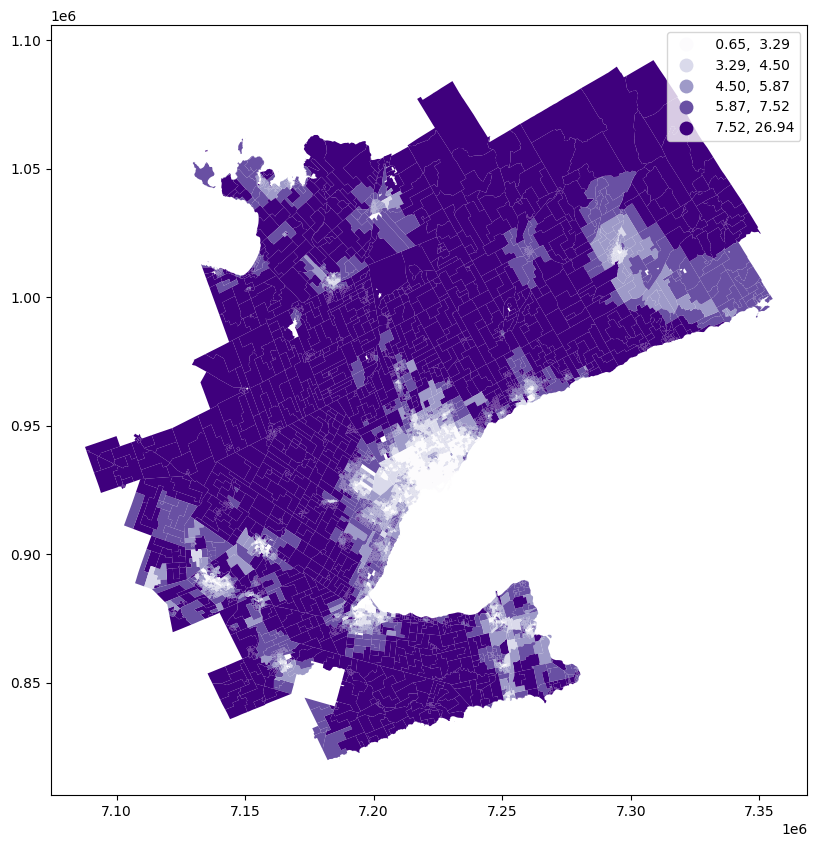

In [147]:
ggh2 = pd.merge(ggh_da, ggh_emission, right_on = "dauid", left_on = "DAUID", sort=False).drop(['dauid'], axis = 1)
ggh2.plot(column = 'Avg Emission (Tons Per Household)', legend = True, cmap = "Purples", scheme="quantiles", figsize=(10, 10))


In [148]:
#summarizing results by municipalities
GGH_DA_with_CSDUID_21['DAUID'] = GGH_DA_with_CSDUID_21['DAUID'].astype('str')
ggh_emission_by_region = pd.merge(ggh_emission, GGH_DA_with_CSDUID_21, left_on = "dauid", right_on = "DAUID")
ggh_emission_by_region

,Total households,dauid,VKT_per_hh,Total_VKT,Travel Emission (Tons Per Household),Total Travel Emission (Tons),G_HH_Energy_GHG,Total Energy Emission (Tons per HH),Total Energy Emission (Tons),Total Emission (Tons),Avg Emission (Tons Per Household),DAUID,Macro,Municipality
0,265.0,35140110,85.594658,22682.584246,7.282333,1929.818285,0.000737,0.737002,195.305425,2125.123710,8.019335,35140110,Outer Ring,County of Northumberland
1,295.0,35140111,84.020058,24785.917256,7.148367,2108.768376,0.000792,0.791617,233.527010,2342.295386,7.939984,35140111,Outer Ring,County of Northumberland
2,220.0,35140112,85.732578,18861.167229,7.294067,1604.694818,0.000776,0.775557,170.622500,1775.317318,8.069624,35140112,Outer Ring,County of Northumberland
3,185.0,35140113,81.712215,15116.759805,6.952018,1286.123273,0.000721,0.720733,133.335659,1419.458931,7.672751,35140113,Outer Ring,County of Northumberland
4,235.0,35140114,84.128746,19770.255323,7.157614,1682.039393,0.000720,0.719850,169.164776,1851.204169,7.877465,35140114,Outer Ring,County of Northumberland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,210.0,35431433,85.180391,17887.882124,7.247088,1521.888407,0.000793,0.793029,166.536070,1688.424477,8.040117,35431433,Outer Ring,County of Simcoe
12995,245.0,35431434,105.432945,25831.071534,8.970161,2197.689366,0.000763,0.763209,186.986275,2384.675641,9.733370,35431434,Outer Ring,County of Simcoe
12996,NaN,35431435,86.323915,NaN,7.344378,NaN,NaN,NaN,NaN,NaN,NaN,35431435,Outer Ring,County of Simcoe
12997,415.0,35431436,88.008418,36523.493558,7.487694,3107.393097,0.000797,0.797165,330.823475,3438.216572,8.284859,35431436,Outer Ring,County of Simcoe


In [149]:

ggh_emission_by_region = pd.pivot_table(ggh_emission_by_region, values = ['Total households', 'Total Emission (Tons)', 'Total Travel Emission (Tons)', 'Total Energy Emission (Tons)'], index = 'Municipality', aggfunc = np.sum).reset_index()
ggh_emission_by_region['Avg Emission (Tons Per Household)'] = ggh_emission_by_region['Total Emission (Tons)'] / ggh_emission_by_region['Total households']
ggh_emission_by_region

,Municipality,Total Emission (Tons),Total Energy Emission (Tons),Total Travel Emission (Tons),Total households,Avg Emission (Tons Per Household)
0,City of Barrie,3.746564e+05,36921.868771,3.377345e+05,55285.0,6.776818
1,City of Brantford,2.431843e+05,27688.234342,2.154960e+05,41670.0,5.835955
2,City of Guelph,3.025650e+05,35612.272441,2.669527e+05,56515.0,5.353711
3,City of Hamilton,1.219825e+06,142611.257126,1.077214e+06,222765.0,5.475837
4,City of Kawartha Lakes,2.863544e+05,24209.797226,2.621446e+05,32715.0,8.753000
5,City of Orillia,8.218920e+04,9186.603761,7.300260e+04,14410.0,5.703623
6,City of Peterborough,1.581315e+05,23400.108849,1.347314e+05,35980.0,4.394982
7,City of Toronto,3.187707e+06,553361.095584,2.634346e+06,1160795.0,2.746141
8,County of Brant,1.173459e+05,10773.175617,1.065727e+05,14360.0,8.171717
9,County of Dufferin,2.555477e+05,16982.352902,2.385654e+05,23320.0,10.958307


In [150]:
#summarizing results by macro
ggh_emission_by_Macro = pd.merge(ggh_emission, GGH_DA_with_CSDUID_21, left_on = "dauid", right_on = "DAUID")
ggh_emission_by_Macro


,Total households,dauid,VKT_per_hh,Total_VKT,Travel Emission (Tons Per Household),Total Travel Emission (Tons),G_HH_Energy_GHG,Total Energy Emission (Tons per HH),Total Energy Emission (Tons),Total Emission (Tons),Avg Emission (Tons Per Household),DAUID,Macro,Municipality
0,265.0,35140110,85.594658,22682.584246,7.282333,1929.818285,0.000737,0.737002,195.305425,2125.123710,8.019335,35140110,Outer Ring,County of Northumberland
1,295.0,35140111,84.020058,24785.917256,7.148367,2108.768376,0.000792,0.791617,233.527010,2342.295386,7.939984,35140111,Outer Ring,County of Northumberland
2,220.0,35140112,85.732578,18861.167229,7.294067,1604.694818,0.000776,0.775557,170.622500,1775.317318,8.069624,35140112,Outer Ring,County of Northumberland
3,185.0,35140113,81.712215,15116.759805,6.952018,1286.123273,0.000721,0.720733,133.335659,1419.458931,7.672751,35140113,Outer Ring,County of Northumberland
4,235.0,35140114,84.128746,19770.255323,7.157614,1682.039393,0.000720,0.719850,169.164776,1851.204169,7.877465,35140114,Outer Ring,County of Northumberland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,210.0,35431433,85.180391,17887.882124,7.247088,1521.888407,0.000793,0.793029,166.536070,1688.424477,8.040117,35431433,Outer Ring,County of Simcoe
12995,245.0,35431434,105.432945,25831.071534,8.970161,2197.689366,0.000763,0.763209,186.986275,2384.675641,9.733370,35431434,Outer Ring,County of Simcoe
12996,NaN,35431435,86.323915,NaN,7.344378,NaN,NaN,NaN,NaN,NaN,NaN,35431435,Outer Ring,County of Simcoe
12997,415.0,35431436,88.008418,36523.493558,7.487694,3107.393097,0.000797,0.797165,330.823475,3438.216572,8.284859,35431436,Outer Ring,County of Simcoe


In [151]:
ggh_emission_by_Macro = pd.pivot_table(ggh_emission_by_Macro, values = ['Total households', 'Total Emission (Tons)', 'Total Travel Emission (Tons)', 'Total Energy Emission (Tons)'], index = 'Macro', aggfunc = np.sum).reset_index()
ggh_emission_by_Macro['Avg Emission (Tons Per Household)'] = ggh_emission_by_Macro['Total Emission (Tons)'] / ggh_emission_by_Macro['Total households']
ggh_emission_by_Macro

,Macro,Total Emission (Tons),Total Energy Emission (Tons),Total Travel Emission (Tons),Total households,Avg Emission (Tons Per Household)
0,GTHA,1.256900e+07,1.553827e+06,1.101518e+07,2676945.0,4.695279
1,Outer Ring,6.499372e+06,6.471134e+05,5.852258e+06,942820.0,6.893545


In [152]:
#creating a new row that sums everthing except the "Avg Emission (Tons Per Household)" field

cList = ["Total"]
for column in ggh_emission_by_Macro.columns.tolist()[1:-1]:
    cList.append(ggh_emission_by_Macro[column].sum())

cList.append(cList[1]/cList[4])
ggh_emission_by_Macro.loc[2] = cList
ggh_emission_by_Macro

,Macro,Total Emission (Tons),Total Energy Emission (Tons),Total Travel Emission (Tons),Total households,Avg Emission (Tons Per Household)
0,GTHA,1.256900e+07,1.553827e+06,1.101518e+07,2676945.0,4.695279
1,Outer Ring,6.499372e+06,6.471134e+05,5.852258e+06,942820.0,6.893545
2,Total,1.906838e+07,2.200940e+06,1.686744e+07,3619765.0,5.267849


In [153]:

exportTable = pd.merge(region_summary, ggh_emission_by_region, on = "Municipality").drop(["Census ID", "CDUID2"], axis = 1)
exportTable

,Macro,Municipality,Total Emission (Tons),Total Energy Emission (Tons),Total Travel Emission (Tons),Total households,Avg Emission (Tons Per Household)
0,GTHA,Region of Durham,1.854894e+06,169423.358414,1.685471e+06,242970.0,7.634252
1,GTHA,Region of York,2.418473e+06,267166.319095,2.151306e+06,391065.0,6.184324
2,GTHA,City of Toronto,3.187707e+06,553361.095584,2.634346e+06,1160795.0,2.746141
3,GTHA,Region of Peel,2.473229e+06,283909.277487,2.189319e+06,450710.0,5.487406
4,GTHA,Region of Halton,1.414877e+06,137355.524364,1.277522e+06,208640.0,6.781428
5,GTHA,City of Hamilton,1.219825e+06,142611.257126,1.077214e+06,222765.0,5.475837
6,Outer Ring,County of Northumberland,3.434639e+05,26994.698863,3.164692e+05,37320.0,9.203213
7,Outer Ring,County of Peterborough,1.949752e+05,20021.194528,1.749540e+05,25750.0,7.571852
8,Outer Ring,City of Peterborough,1.581315e+05,23400.108849,1.347314e+05,35980.0,4.394982
9,Outer Ring,City of Kawartha Lakes,2.863544e+05,24209.797226,2.621446e+05,32715.0,8.753000


In [154]:

#add values to the municipality field
ggh_macro = ggh_emission_by_Macro.values.tolist()
ggh_macro[0].insert(1, "GTHA Sum")
ggh_macro[1].insert(1, "Outer Ring Sum")
ggh_macro[2].insert(1, "Overall Sum")

#Insert the rows
exportTable.loc[21] = ggh_macro[0]
exportTable.loc[22] = ggh_macro[1]
exportTable.loc[23] = ggh_macro[2]
exportTable.to_csv("../ghg-analysis/total_ghg_by_municipalities.csv")

<Axes: >

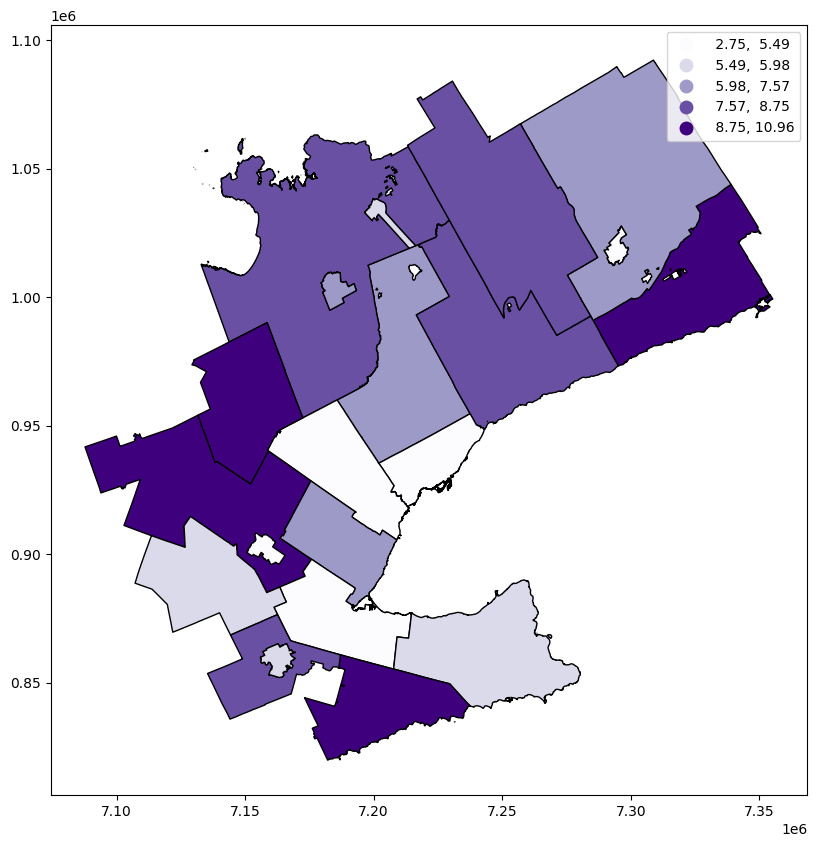

In [155]:
ggh_regions = gpd.read_file("../ggh-growth-plan-regions.geojson")
ggh2 = pd.merge(ggh_regions, exportTable, right_on = "Municipality", left_on = "Name", sort=False).drop(['Name'], axis = 1)
ggh2.plot(column = 'Avg Emission (Tons Per Household)', legend = True, cmap = "Purples", scheme="quantiles", edgecolor = "black", linewidth = 1, figsize=(10, 10))


# Part C - Estimating Average GHG Emissions for Different Neighbourhood Types

In [178]:
daRatio = pd.read_csv("../census-summary-data-2006-2021/part-b-results/GGH-boundaries-intersect-21.csv")
daRatio = daRatio[['DAUID', 'PerAreaBLT', 'PerAreaUGC', 'PerAreaTBF']].copy()

householdRatio = pd.merge(daRatio, household_2021, left_on = "DAUID", right_on = "GEO UID").drop("GEO UID", axis =1)

### C1)
$$ R_i = \frac{\sum G_i w_i}{\sum H_i w_i} $$

where <br>
$G_i$ is the total GHG emission in $DA_i$ <br>
$H_i$ is the total household in $DA_i$ <br>
$w_i$ is the ratio of area within / outside of BLT, UGC, TBF <br>
$R_i$ is the ghg emission per household within BLT, UGC, TBF <br>

$H_i w_i$ are fields below <br>
- HHwithinBLT
- HHwithinUGC
- HHwithinTBF

In [179]:
#calculation ratio of household within the three geographies
geoList = ['BLT', 'UGC', 'TBF']
for geo in geoList:
    householdRatio[f'HHwithin{geo}'] = householdRatio[f'PerArea{geo}']*householdRatio['Total households']
    

In [180]:
householdRatio = householdRatio.fillna(0)
#create a copy of the emission table
ggh_emission_simple = ggh_emission[['dauid','Total Emission (Tons)']].copy()
#join with household to calculate 
householdRatio['DAUID'] = householdRatio['DAUID'].astype('str')
emissionWithin = pd.merge(householdRatio, ggh_emission_simple, left_on = "DAUID", right_on = "dauid").drop("dauid", axis =1)


$G_i w_i$ are fields below <br>
- 'ghgWithinBLT (Tons)', <br>
- 'ghgWithinUGC (Tons)', <br>
- 'ghgWithinTBF (Tons)', <br>
- 'ghgBeyondBLT (Tons)', <br>
- 'ghgBeyondUGC (Tons)', <br>
- 'ghgBeyondTBF (Tons)', <br>

In [181]:

for geo in geoList:
    emissionWithin[f'ghgWithin{geo} (Tons)'] = emissionWithin[f'PerArea{geo}'] * emissionWithin['Total Emission (Tons)']
    emissionWithin[f'ghgBeyond{geo} (Tons)'] = (1-emissionWithin[f'PerArea{geo}']) * emissionWithin['Total Emission (Tons)']


emissionWithin = pd.merge(GGH_DA_with_CSDUID_21, emissionWithin, on = "DAUID")
emissionWithin

,DAUID,Macro,Municipality,PerAreaBLT,PerAreaUGC,PerAreaTBF,Total households,HHwithinBLT,HHwithinUGC,HHwithinTBF,Total Emission (Tons),ghgWithinBLT (Tons),ghgBeyondBLT (Tons),ghgWithinUGC (Tons),ghgBeyondUGC (Tons),ghgWithinTBF (Tons),ghgBeyondTBF (Tons)
0,35140110,Outer Ring,County of Northumberland,0.000000,0.0,0.0,265.0,0.000000,0.0,0.0,2125.123710,0.000000,2125.123710,0.0,2125.123710,0.0,2125.123710
1,35140111,Outer Ring,County of Northumberland,0.014028,0.0,0.0,295.0,4.138257,0.0,0.0,2342.295386,32.857693,2309.437693,0.0,2342.295386,0.0,2342.295386
2,35140112,Outer Ring,County of Northumberland,0.018007,0.0,0.0,220.0,3.961601,0.0,0.0,1775.317318,31.968634,1743.348685,0.0,1775.317318,0.0,1775.317318
3,35140113,Outer Ring,County of Northumberland,0.024970,0.0,0.0,185.0,4.619418,0.0,0.0,1419.458931,35.443645,1384.015286,0.0,1419.458931,0.0,1419.458931
4,35140114,Outer Ring,County of Northumberland,0.997850,0.0,0.0,235.0,234.494717,0.0,0.0,1851.204169,1847.223818,3.980351,0.0,1851.204169,0.0,1851.204169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,35431238,Outer Ring,County of Simcoe,0.000000,0.0,0.0,340.0,0.000000,0.0,0.0,1801.386157,0.000000,1801.386157,0.0,1801.386157,0.0,1801.386157
12995,35431253,Outer Ring,County of Simcoe,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12996,35431255,Outer Ring,County of Simcoe,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12997,35431256,Outer Ring,County of Simcoe,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$\sum G_i w_i$ & $\sum H_i w_i$<br>
is summing by region

In [182]:
values = emissionWithin.columns.tolist()[6:]
#calculating by municipality
emissionByRegion = pd.pivot_table(emissionWithin, values = values , index = 'Municipality', aggfunc = np.sum, sort = False).reset_index() 
emissionByRegion = emissionByRegion.replace(0,1)
emissionByRegion

,Municipality,Total households,HHwithinBLT,HHwithinUGC,HHwithinTBF,Total Emission (Tons),ghgWithinBLT (Tons),ghgBeyondBLT (Tons),ghgWithinUGC (Tons),ghgBeyondUGC (Tons),ghgWithinTBF (Tons),ghgBeyondTBF (Tons)
0,County of Northumberland,37320.0,1.564999e+04,1.000000,1.000000,3.434639e+05,1.652919e+05,178171.997577,1.000000,3.434639e+05,1.000000e+00,3.434639e+05
1,City of Peterborough,35980.0,3.176856e+04,1360.227153,1.000000,1.581315e+05,1.364586e+05,21672.873298,4562.923587,1.535685e+05,1.000000e+00,1.581315e+05
2,County of Peterborough,25750.0,1.248382e+03,1.000000,1.000000,1.949752e+05,9.534884e+03,185440.306250,1.000000,1.949752e+05,1.000000e+00,1.949752e+05
3,City of Kawartha Lakes,32715.0,9.616160e+03,1.000000,1.000000,2.863544e+05,6.899315e+04,217361.227360,1.000000,2.863544e+05,1.000000e+00,2.863544e+05
4,Region of Durham,242970.0,1.895528e+05,4736.005585,7433.942625,1.854894e+06,1.323690e+06,531204.045270,19074.332281,1.835820e+06,4.541568e+04,1.809478e+06
5,Region of York,391065.0,2.800933e+05,3821.833635,37839.820364,2.418473e+06,1.609548e+06,808924.571345,16422.399473,2.402050e+06,1.996419e+05,2.218831e+06
6,City of Toronto,1160795.0,1.158985e+06,220023.807865,494170.402188,3.187707e+06,3.178623e+06,9083.939647,369255.180621,2.818452e+06,1.116174e+06,2.071532e+06
7,Region of Peel,450710.0,3.859698e+05,30340.199631,40133.167461,2.473229e+06,1.986133e+06,487095.511888,93370.710272,2.379858e+06,1.788859e+05,2.294343e+06
8,County of Dufferin,23320.0,1.171381e+04,1.000000,1.000000,2.555477e+05,1.169365e+05,138611.194407,1.000000,2.555477e+05,1.000000e+00,2.555477e+05
9,City of Guelph,56515.0,4.822384e+04,2268.380307,5033.853987,3.025650e+05,2.444067e+05,58158.273799,6479.781930,2.960852e+05,1.712122e+04,2.854438e+05


In [183]:
#calculating for Macro
emissionByMacro = pd.pivot_table(emissionWithin, values = values , index = 'Macro', aggfunc = np.sum, sort = False).reset_index() 
emissionByMacro = emissionByMacro.replace(0,1)
#adding a total row
sumlist = ["Total"]
for column in emissionByMacro.columns.tolist()[1:]:
    sumlist.append(emissionByMacro[column].sum())

emissionByMacro.loc[2] = sumlist


$$ R_i = \frac{\sum G_i w_i}{\sum H_i w_i} $$

In [184]:
#average for municipalities
AvgEmissionByRegion = emissionByRegion['Municipality'].copy().reset_index()

for geo in geoList:
    AvgEmissionByRegion[f'GHGWithin{geo} (Ton per HH)'] = emissionByRegion[f'ghgWithin{geo} (Tons)'] / emissionByRegion[f'HHwithin{geo}']
    AvgEmissionByRegion[f'GHGBeyond{geo} (Ton per HH)'] = emissionByRegion[f'ghgBeyond{geo} (Tons)'] / (emissionByRegion['Total households'] - emissionByRegion[f'HHwithin{geo}'])
AvgEmissionByRegion = AvgEmissionByRegion.replace(1, 0)
AvgEmissionByRegion = pd.merge(region_summary, AvgEmissionByRegion, on = "Municipality").drop(["Census ID", "CDUID2", "index"], axis = 1)


In [185]:
#average for Macro
AvgEmissionByMacro = emissionByMacro['Macro'].copy().reset_index()

for geo in geoList:
    AvgEmissionByMacro[f'GHGWithin{geo} (Ton per HH)'] = emissionByMacro[f'ghgWithin{geo} (Tons)'] / emissionByMacro[f'HHwithin{geo}']
    AvgEmissionByMacro[f'GHGBeyond{geo} (Ton per HH)'] = emissionByMacro[f'ghgBeyond{geo} (Tons)'] / (emissionByMacro['Total households'] - emissionByMacro[f'HHwithin{geo}'])
AvgEmissionByMacro = AvgEmissionByMacro.replace(1, 0)
AvgEmissionByMacro = AvgEmissionByMacro.drop("index", axis =1)


In [186]:
avglist = AvgEmissionByMacro.values.tolist()
avglist[0].insert(1, "Outer Ring Average")
avglist[1].insert(1, "GTHA Average")
avglist[2].insert(1, "Total Average")

outer = avglist[0]
gtha = avglist[1]
total = avglist[2]

AvgEmissionByRegion.loc[21] = gtha
AvgEmissionByRegion.loc[22] = outer
AvgEmissionByRegion.loc[23] = total
AvgEmissionByRegion


,Macro,Municipality,GHGWithinBLT (Ton per HH),GHGBeyondBLT (Ton per HH),GHGWithinUGC (Ton per HH),GHGBeyondUGC (Ton per HH),GHGWithinTBF (Ton per HH),GHGBeyondTBF (Ton per HH)
0,GTHA,Region of Durham,6.983226,9.944438,4.027515,7.705952,6.109232,7.682384
1,GTHA,Region of York,5.746470,7.289468,4.296995,6.202950,5.275973,6.281632
2,GTHA,City of Toronto,2.742591,5.019267,1.678251,2.995895,2.258683,3.107495
3,GTHA,Region of Peel,5.145825,7.523849,3.077459,5.661344,4.457308,5.588096
4,GTHA,Region of Halton,6.464240,7.872826,5.078298,6.835218,6.485481,6.807759
5,GTHA,City of Hamilton,4.998338,7.976240,2.877184,5.551893,2.898707,5.715902
6,Outer Ring,County of Northumberland,10.561794,8.222052,0.000000,9.203460,0.000000,9.203460
7,Outer Ring,County of Peterborough,7.637794,7.568492,0.000000,7.572146,0.000000,7.572146
8,Outer Ring,City of Peterborough,4.295398,5.146185,3.354531,4.435862,0.000000,4.395104
9,Outer Ring,City of Kawartha Lakes,7.174709,9.410049,0.000000,8.753267,0.000000,8.753267


### C2)

In [187]:
"""ggh_emission_pop = ggh_emission[['dauid', 'Total Travel Emission (Tons)', 'Total Energy Emission (Tons)','Total Emission (Tons)']].copy()
ggh_emission_pop"""

"ggh_emission_pop = ggh_emission[['dauid', 'Total Travel Emission (Tons)', 'Total Energy Emission (Tons)','Total Emission (Tons)']].copy()\nggh_emission_pop"

- Outside the built boundary AND population density of >= 100 people/km2 (i.e. not rural)
  - outside of the built boundary:
    - where PerAreaBLT is smaller than 1 (less than 100%)
  - population density > =  100


In [188]:
emissionWithin_pop = emissionWithin[['DAUID', 'Macro', 'Municipality', "ghgWithinBLT (Tons)", "ghgBeyondBLT (Tons)", "HHwithinBLT"]].copy()
census_2021["GEO UID"] = census_2021["GEO UID"].astype('str')
census_2021_pop = census_2021[['GEO UID', "Land area in square kilometres", "Population", 'Total households']].copy()
census_2021_pop['Population Density (ppl/km2)'] = census_2021["Population"] / census_2021["Land area in square kilometres"] 
pop_emission_table = pd.merge(emissionWithin_pop, census_2021_pop, left_on = "DAUID", right_on = "GEO UID").drop(['GEO UID', 'Land area in square kilometres', 'Population'], axis =1)
pop_emission_table.to_csv("../ghg-analysis/DA Emission Table with Population Density")


In [218]:
region_summary_simple = region_summary[['Municipality', 'Macro']].copy()

In [219]:
# where population density is larger than 100 ppl / km2
pop_100_out_BLT = pop_emission_table[pop_emission_table["Population Density (ppl/km2)"] >= 100]
#where it is outside of the Built Boundary
pop_100_out_BLT_region = pd.pivot_table(pop_100_out_BLT, values = ["ghgBeyondBLT (Tons)", "HHwithinBLT", 'Total households'],index = "Municipality", aggfunc = np.sum).reset_index()
pop_100_out_BLT_macro =  pd.pivot_table(pop_100_out_BLT, values = ["ghgBeyondBLT (Tons)", "HHwithinBLT", 'Total households'],index = "Macro", aggfunc = np.sum).reset_index()
pop_100_out_BLT_region['Avg GHG Beyond BLT and 100'] = (pop_100_out_BLT_region['ghgBeyondBLT (Tons)']) / (pop_100_out_BLT_region['Total households'] - pop_100_out_BLT_region['HHwithinBLT'])
pop_100_out_BLT_macro['Avg GHG Beyond BLT and 100'] = (pop_100_out_BLT_macro['ghgBeyondBLT (Tons)']) / (pop_100_out_BLT_macro['Total households'] - pop_100_out_BLT_macro['HHwithinBLT'])

#pop_100_out_BLT_region['Avg GHG Beyond BLT and 100'] = pop_100_out_BLT_region['ghgBeyondBLT (Tons)'] / total_ggh_hh
#pop_100_out_BLT_macro['Avg GHG Beyond BLT and 100'] = pop_100_out_BLT_macro['ghgBeyondBLT (Tons)'] / total_ggh_hh
pop_100_out_BLT_region = pd.merge(region_summary_simple, pop_100_out_BLT_region, on = "Municipality")

#adding the macro summary
lista = pop_100_out_BLT_macro.columns.tolist()
total = ['Total']
for a in lista[1:-1]:
    summing = pop_100_out_BLT_macro[a].sum()
    total.append(summing)
summing = total[3] / (total[2] - total[1])
total.append(summing)

pop_100_out_BLT_macro.loc[2] = total
pop_100_out_BLT_macro.insert(0, "Municipality", pop_100_out_BLT_macro['Macro'])

pop_100 = pd.concat([pop_100_out_BLT_region, pop_100_out_BLT_macro])
pop_100 = pop_100[['Municipality', 'Avg GHG Beyond BLT and 100']].copy()
pop_100

,Municipality,Avg GHG Beyond BLT and 100
0,Region of Durham,9.391023
1,Region of York,7.027936
2,City of Toronto,5.068726
3,Region of Peel,7.057886
4,Region of Halton,7.658135
5,City of Hamilton,7.536851
6,County of Northumberland,9.146104
7,County of Peterborough,6.847059
8,City of Peterborough,5.146185
9,City of Kawartha Lakes,7.615988


- Inside the built boundary AND population density >= 5000 people/km2
  - inside the built boundary:
    - where PerAreaBLT is larger than 0 (at least a bit within)


In [220]:
# where population density is larger than 100 ppl / km2
pop_5k_in_BLT = pop_emission_table[pop_emission_table["Population Density (ppl/km2)"] >= 5000]
#where it is outside of the Built Boundary
pop_5k_in_BLT_region = pd.pivot_table(pop_5k_in_BLT, values = ["ghgWithinBLT (Tons)", "HHwithinBLT", 'Total households'],index = "Municipality", aggfunc = np.sum).reset_index()

pop_5k_in_BLT_region['Avg GHG in BLT and 5k'] = (pop_5k_in_BLT_region['ghgWithinBLT (Tons)']) / pop_5k_in_BLT_region['HHwithinBLT']

#pop_5k_in_BLT_region['Avg GHG in BLT and 5k'] = (pop_5k_in_BLT_region['ghgWithinBLT (Tons)']) / total_ggh_hh
pop_5k_in_BLT_region = pd.merge(region_summary_simple, pop_5k_in_BLT_region, on = "Municipality")
pop_5k_in_BLT_macro =  pd.pivot_table(pop_5k_in_BLT, values = ["ghgWithinBLT (Tons)", "HHwithinBLT", 'Total households'],index = "Macro", aggfunc = np.sum).reset_index()
pop_5k_in_BLT_macro['Avg GHG in BLT and 5k'] = pop_5k_in_BLT_macro['ghgWithinBLT (Tons)'] / pop_5k_in_BLT_macro['HHwithinBLT']

#pop_5k_in_BLT_macro['Avg GHG in BLT and 5k'] = pop_5k_in_BLT_macro['ghgWithinBLT (Tons)'] / total_ggh_hh


#adding the macro summary
lista = pop_5k_in_BLT_macro.columns.tolist()
total = ['Total']
for a in lista[1:-1]:
    summing = pop_5k_in_BLT_macro[a].sum()
    total.append(summing)
summing = total[3] / (total[1])
total.append(summing)

pop_5k_in_BLT_macro.loc[2] = total
pop_5k_in_BLT_macro.insert(0, "Municipality", pop_5k_in_BLT_macro['Macro'])

pop_5k = pd.concat([pop_5k_in_BLT_region, pop_5k_in_BLT_macro])

In [221]:
pop_5k = pop_5k[['Municipality', 'Avg GHG in BLT and 5k']].copy()
pop_5k

,Municipality,Avg GHG in BLT and 5k
0,Region of Durham,6.964611
1,Region of York,4.804456
2,City of Toronto,2.458124
3,Region of Peel,4.825451
4,Region of Halton,6.212462
5,City of Hamilton,4.073325
6,City of Peterborough,3.396224
7,County of Simcoe,8.380235
8,City of Barrie,7.147801
9,City of Orillia,5.660945



- Inside the built boundary AND population density >= 10000 people/km2
  - inside the built boundary:
      - where PerAreaBLT is larger than 0 (at least a bit within)

In [222]:
# where population density is larger than 100 ppl / km2
pop_10k_in_BLT = pop_emission_table[pop_emission_table["Population Density (ppl/km2)"] >= 10000]
#where it is outside of the Built Boundary
pop_10k_in_BLT_region = pd.pivot_table(pop_10k_in_BLT, values = ["ghgWithinBLT (Tons)", "HHwithinBLT", 'Total households'],index = "Municipality", aggfunc = np.sum).reset_index()

pop_10k_in_BLT_region['Avg GHG in BLT and 10k'] = (pop_10k_in_BLT_region['ghgWithinBLT (Tons)']) / pop_10k_in_BLT_region['HHwithinBLT']
#pop_10k_in_BLT_region['Avg GHG in BLT and 10k'] = (pop_10k_in_BLT_region['ghgWithinBLT (Tons)']) / total_ggh_hh
pop_10k_in_BLT_region = pd.merge(region_summary_simple, pop_10k_in_BLT_region, on = "Municipality")
pop_10k_in_BLT_macro =  pd.pivot_table(pop_10k_in_BLT, values = ["ghgWithinBLT (Tons)", "HHwithinBLT", 'Total households'],index = "Macro", aggfunc = np.sum).reset_index()
pop_10k_in_BLT_macro['Avg GHG in BLT and 10k'] = pop_10k_in_BLT_macro['ghgWithinBLT (Tons)'] / pop_10k_in_BLT_macro['HHwithinBLT']
#pop_10k_in_BLT_macro['Avg GHG in BLT and 10k'] = pop_10k_in_BLT_macro['ghgWithinBLT (Tons)'] / total_ggh_hh
#adding the macro summary
lista = pop_10k_in_BLT_macro.columns.tolist()
total = ['Total']
for a in lista[1:-1]:
    summing = pop_10k_in_BLT_macro[a].sum()
    total.append(summing)
summing = total[3] / (total[1])
total.append(summing)

pop_10k_in_BLT_macro.loc[2] = total
pop_10k_in_BLT_macro.insert(0, "Municipality", pop_10k_in_BLT_macro['Macro'])
pop_10k = pd.concat([pop_10k_in_BLT_region, pop_10k_in_BLT_macro])

pop_10k = pop_10k[['Municipality', 'Avg GHG in BLT and 10k']].copy()
pop_10k

,Municipality,Avg GHG in BLT and 10k
0,Region of Durham,5.117435
1,Region of York,3.565713
2,City of Toronto,2.215444
3,Region of Peel,3.768991
4,Region of Halton,5.175522
5,City of Hamilton,3.265847
6,City of Peterborough,3.270088
7,City of Guelph,3.592196
8,Region of Waterloo,4.057224
9,Region of Niagara,3.289308


In [223]:
final = pd.merge(pop_100, pop_5k, on = "Municipality", how = "outer" )
final = pd.merge(final, pop_10k, on = "Municipality", how = "outer" )
final_copy = final[['Municipality', 'Avg GHG Beyond BLT and 100', 'Avg GHG in BLT and 5k', 'Avg GHG in BLT and 10k']].copy()
final_copy = pd.merge(region_summary_simple, final_copy, on = "Municipality", how = "outer").sort_values(by = "Macro")
final_copy = final_copy.fillna(0)

<Axes: >

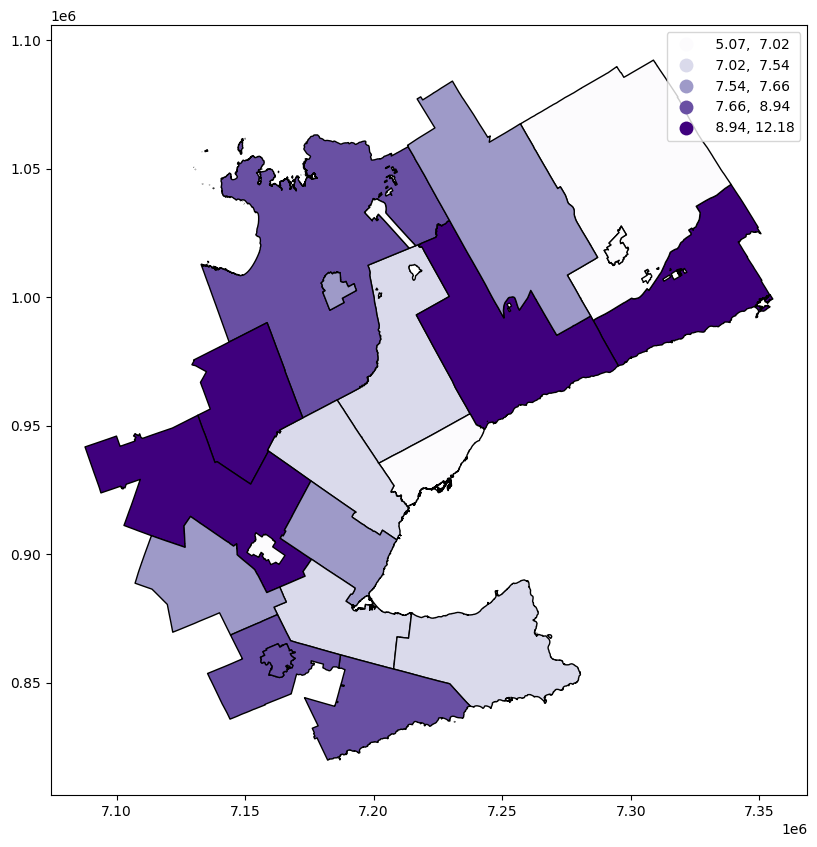

In [224]:
ggh_regions = gpd.read_file("../ggh-growth-plan-regions.geojson")
ggh3 = pd.merge(ggh_regions, final_copy, right_on = "Municipality", left_on = "Name", sort=False).drop(['Name'], axis = 1)
ggh3.plot(column = 'Avg GHG Beyond BLT and 100', legend = True, cmap = "Purples", scheme="quantiles", edgecolor = "black", linewidth = 1, figsize=(10, 10))


<Axes: >

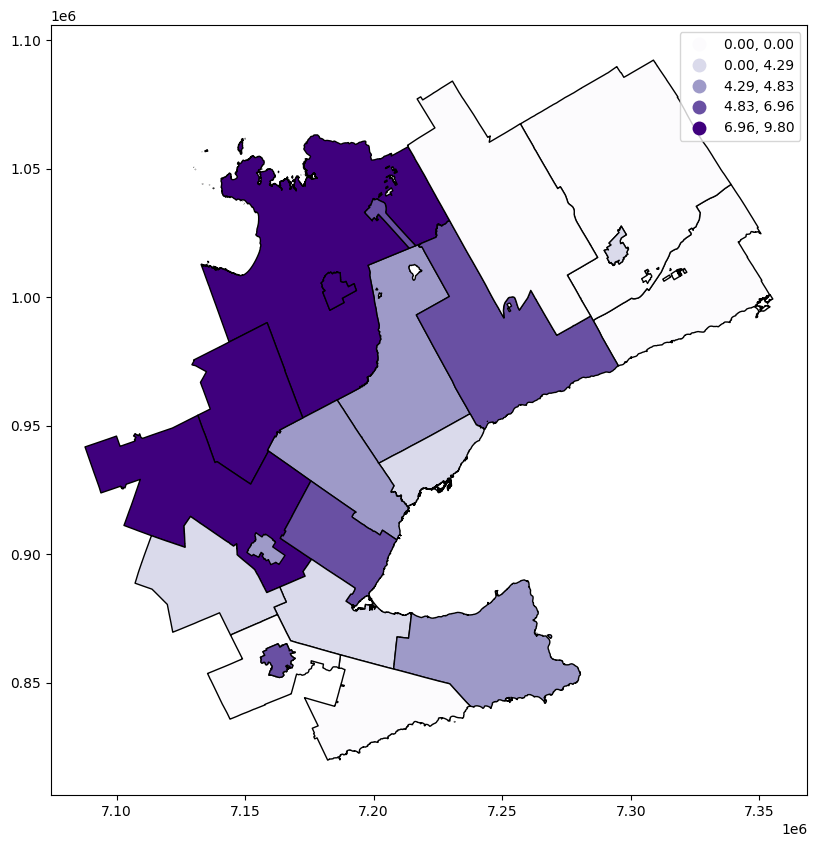

In [225]:
ggh3.plot(column = 'Avg GHG in BLT and 5k', legend = True, cmap = "Purples", scheme="quantiles", edgecolor = "black", linewidth = 1, figsize=(10, 10))

c:\Users\mliu\AppData\Local\Programs\Python\Python311\Lib\site-packages\mapclassify\classifiers.py:257: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


<Axes: >

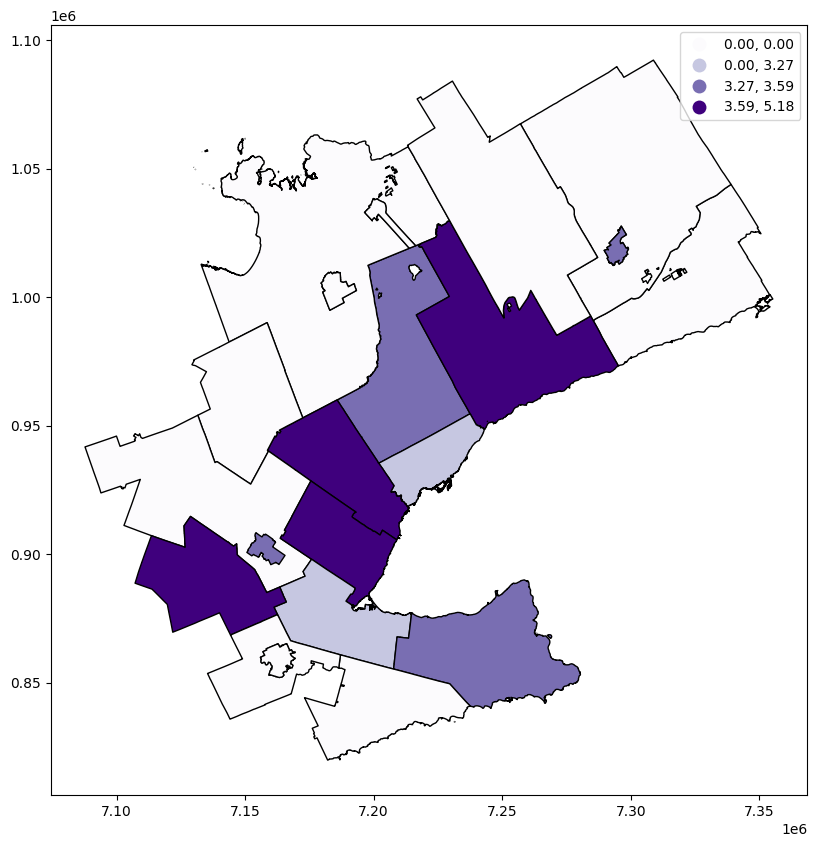

In [226]:
ggh3.plot(column = 'Avg GHG in BLT and 10k', legend = True, cmap = "Purples", scheme="quantiles", edgecolor = "black", linewidth = 1, figsize=(10, 10))